<a href="https://colab.research.google.com/github/alikrc/urban-sounds-classification/blob/main/Urban_Sounds_Classification_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from cv2 import imshow
import tensorflow as tf
import cv2 
import glob
# from PIL import Image
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.model_selection as ms
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


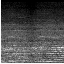

In [3]:
base_path = '/content/drive/MyDrive/soundsClassification/'

x_train=np.load(base_path+'x_train.npy')
y_train=np.load(base_path+'y_train.npy')
x_val=np.load(base_path+'x_val.npy')
y_val=np.load(base_path+'y_val.npy')
x_test=np.load(base_path+'x_test.npy')
y_test=np.load(base_path+'y_test.npy')

cv2_imshow(x_train[0])

In [4]:
np.shape(x_train), np.shape(y_train)

((5238, 64, 64), (5238,))

In [5]:
np.shape(x_val), np.shape(y_val)

((1747, 64, 64), (1747,))

In [6]:
np.shape(x_test), np.shape(y_test)

((1747, 64, 64), (1747,))

In [7]:
input_shape = 64
model = keras.Sequential(
    [
        layers.Conv2D(6, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(input_shape, input_shape, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"),


        layers.Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),


        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(84, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          880       
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [8]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

results = model.fit(x_train, y_train, epochs=23, validation_data=(x_val, y_val))

Epoch 1/23


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


164/164 [==============================] - 15s 7ms/step - loss: 2.4308 - accuracy: 0.2125 - val_loss: 1.7282 - val_accuracy: 0.3904
Epoch 2/23
164/164 [==============================] - 1s 4ms/step - loss: 1.7612 - accuracy: 0.3612 - val_loss: 1.5031 - val_accuracy: 0.4539
Epoch 3/23
164/164 [==============================] - 1s 4ms/step - loss: 1.5764 - accuracy: 0.4252 - val_loss: 1.3994 - val_accuracy: 0.5186
Epoch 4/23
164/164 [==============================] - 1s 4ms/step - loss: 1.4663 - accuracy: 0.4632 - val_loss: 1.3265 - val_accuracy: 0.5363
Epoch 5/23
164/164 [==============================] - 1s 4ms/step - loss: 1.3860 - accuracy: 0.5019 - val_loss: 1.2640 - val_accuracy: 0.5655
Epoch 6/23
164/164 [==============================] - 1s 4ms/step - loss: 1.3078 - accuracy: 0.5330 - val_loss: 1.2153 - val_accuracy: 0.5873
Epoch 7/23
164/164 [==============================] - 1s 4ms/step - loss: 1.2342 - accuracy: 0.5743 - val_loss: 1.1087 - val_accuracy: 0.6468
Epoch 8/23
164/1

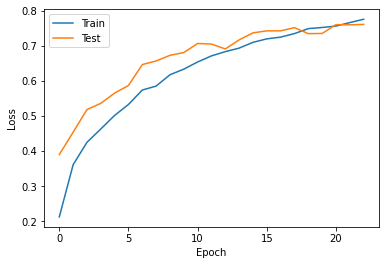

In [13]:
plt.plot(results.history['accuracy'], label='Train')
plt.plot(results.history['val_accuracy'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

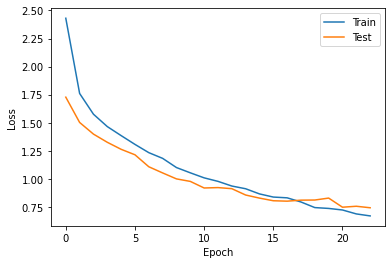

In [11]:
plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [12]:
test_result = model.test_on_batch(x_test, y_test)

print(test_result)

[0.7110801339149475, 0.7681739926338196]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
